# Studying the paper <br>"Introduction to Coding Quantum Algorithms: <br>A Tutorial Series Using Qiskit"

### Find the paper here https://arxiv.org/abs/1903.04359


# Lesson 1 

In [127]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
import numpy as np
import math as m
S_simulator = Aer.backends(name="statevector_simulator")[0]
M_simulator = Aer.backends(name="qasm_simulator")[0]

In [128]:
# one qubit Hadamard 
q = QuantumRegister(1)
one_q = QuantumCircuit(q)

one_q.h(q[0])

job = execute(one_q, S_simulator) 
result = job.result()
print(result.get_statevector())

# Remember these values are amplitudes that are square roots of probability
print(result.get_statevector() ** 2)

[0.70710678+0.j 0.70710678+0.j]
[0.5+0.j 0.5+0.j]


In [129]:
# 1 qubit count example
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.measure(q,c)

job = execute(qc, M_simulator)
result = job.result()
result.get_counts(qc)

{'1': 508, '0': 516}

{'01': 268, '11': 250, '10': 257, '00': 249}


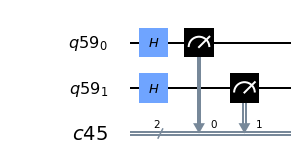

In [130]:
# 2 qubit count example
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.h(q[1])
qc.measure(q,c)

job = execute(qc, M_simulator)
result = job.result()
print(result.get_counts(qc))
qc.draw("mpl")

{'01': 527, '00': 497}


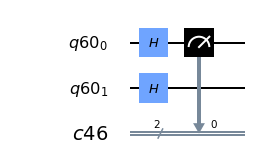

In [131]:
# Partial measurement example 
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.h(q[1])

# partial measurement 
qc.measure(q[0],c[0])

job = execute(qc, M_simulator)
result = job.result()
print(result.get_counts(qc))
qc.draw("mpl")

#### An interesting point from the two examples above is that when measuring both qubits, there is a uniform distribution between 4 states whereas a partial measurement is a uni. dist. across 2 states. 

{'010': 515, '000': 509}


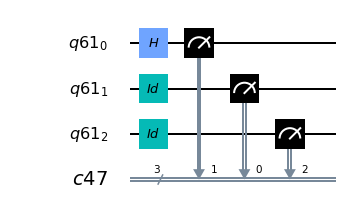

In [132]:
# 3 qubit count example
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.iden(q[1])
qc.iden(q[2])
qc.measure(q[0],c[1])
qc.measure(q[1],c[0])
qc.measure(q[2],c[2])

job = execute(qc, M_simulator)
result = job.result()
print(result.get_counts(qc))
qc.draw("mpl")

#### Example above shows that you can measure the state of a qubit into a classical bit of another index. See above that q0 -> c1 so the result states are measuring accross the middle bit (i.e., 000 & 010). 

## Quantum Coin Flip Problem
”Alice and Bob have recently gotten into an argument about the philosophy of picking the correct side of a coin flip.   Bobwas raised by the moto ”Tails Never Fails”, while Alice was taught ”Tail Always Fails”.  Alice suggests that they solve theirdisagreement with a series of coin flips, but Bob doesn’t trust any coin that Alice owns, and vice versa for Alice.  Thus, they agree to use a qubit as their coin. The loser of the bet must clean the other person’s lab equipment for a month!”

In [133]:
def quantum_coin_flip(num_flips) -> tuple:
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    qc.h(q[0])
    qc.measure(q,c)
    M = execute(qc, M_simulator, shots=num_flips)\
        .result()\
        .get_counts(qc)
    
    return M["0"], M["1"] # heads, tails
quantum_coin_flip(1000)

(462, 538)

# Lesson 2 - Creating More Complex Quantum Circuits

In [134]:
## Some useful info for debugging 

# setup 
q = QuantumRegister(2, name="q")
c = ClassicalRegister(3, name="c")
qc = QuantumCircuit(q,c, name="qc")
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0], c[0])

# under the hood
print("__qc.qasm()__")
print(qc.qasm()[36:])

print("__qc.data__")
print("\n".join([str(i) for i in qc.data]))

print("\n__qc.qregs__")
print(qc.qregs)

print("\n__qc.cregs__")
print(qc.cregs)

__qc.qasm()__
qreg q[2];
creg c[3];
h q[0];
h q[1];
measure q[0] -> c[0];

__qc.data__
(<qiskit.extensions.standard.h.HGate object at 0x1a2297c128>, [Qubit(QuantumRegister(2, 'q'), 0)], [])
(<qiskit.extensions.standard.h.HGate object at 0x1a2297c588>, [Qubit(QuantumRegister(2, 'q'), 1)], [])
(<qiskit.circuit.measure.Measure object at 0x1a228964a8>, [Qubit(QuantumRegister(2, 'q'), 0)], [Clbit(ClassicalRegister(3, 'c'), 0)])

__qc.qregs__
[QuantumRegister(2, 'q')]

__qc.cregs__
[ClassicalRegister(3, 'c')]


In [135]:
# Making two qcircuits interact (manually)
q = QuantumRegister(1, name="q")
c = ClassicalRegister(1, name="c")
qc = QuantumCircuit(q,c, name="qc")

q2 = QuantumRegister(1, name="q2")
c2 = ClassicalRegister(1, name="c2")
qc2 = QuantumCircuit(q2,c2, name="qc2")

# manual add regs
qc.add_register(c2)
qc2.add_register(q)

qc.h(q[0])
qc2.h(q2[0])
qc.measure(q[0],c2[0])
qc2.h(q[0])

print(qc.draw())
print(qc2.draw())

        ┌───┐┌─┐
q_0: |0>┤ H ├┤M├
        └───┘└╥┘
 c_0: 0 ══════╬═
              ║ 
c2_0: 0 ══════╩═
                
         ┌───┐
q2_0: |0>┤ H ├
         ├───┤
 q_0: |0>┤ H ├
         └───┘
 c2_0: 0 ═════
              


#### good point: 
One way to think about the relationship between registers and circuits, is thatQuantumCircuitsneed permission to use registers.Our quantum and classical registers are the physical quantities where our qubits and classical bits live.  Thus, we should avoidthinking of our algorithms as ”QuantumCircuit1’s registers”, but more like ”QuantumCircuit1 has access toregisters”.

In [136]:
# Combine two QuantumCircuits the right way
q1 = QuantumRegister(2, name="q1")
c1 = ClassicalRegister(3, name="c1")
qc1 = QuantumCircuit(q1,c1, name="qc1")

q2 = QuantumRegister(2, name="q2")
c2 = ClassicalRegister(3, name="c2")
qc2 = QuantumCircuit(q2,c2, name="qc2")

qc1.h(q1[0])
qc1.iden(q1[1])
qc2.iden(q2[0])
qc2.h(q2[1])

# new qc
qc3 = qc1 + qc2 
print("____ q3 = q1 + q2 ____")
print(qc3.qasm()[36:])

# append qc
qc1 += qc2
print("____ q1 += q2 ____")
print(qc1.qasm()[36:])

____ q3 = q1 + q2 ____
qreg q1[2];
qreg q2[2];
creg c1[3];
creg c2[3];
h q1[0];
id q1[1];
id q2[0];
h q2[1];

____ q1 += q2 ____
qreg q1[2];
qreg q2[2];
creg c1[3];
creg c2[3];
h q1[0];
id q1[1];
id q2[0];
h q2[1];



In [137]:
# Some Visualizations 
q = QuantumRegister(2, name="q")
c = ClassicalRegister(2, name="c")
qc = QuantumCircuit(q,c, name="qc")
qc.h(q[0])
qc.iden(q[1])
qc.measure(q,c)
qc.draw()

┌───┐ ┌─┐   
q_0: |0>┤ H ├─┤M├───
        ├───┴┐└╥┘┌─┐
q_1: |0>┤ Id ├─╫─┤M├
        └────┘ ║ └╥┘
 c_0: 0 ═══════╩══╬═
                  ║ 
 c_1: 0 ══════════╩═

# Lesson 3 - Gates Provided by Qiskit


In [138]:
from qiskit.tools.visualization import circuit_drawer
import Our_Qiskit_Functions as oq

In [141]:
# vis H
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.iden(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))
print("__ After H __")
qc.h(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
1.0  |0>   
__ After H __
0.70711  |0>   0.70711  |1>   


┌────┐┌───┐
q_0: |0>┤ Id ├┤ H ├
        └────┘└───┘

### Pauli Operators

In [142]:
# vis X (Pauli Operator)
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.iden(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))
print("__ After X __")
qc.x(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
1.0  |0>   
__ After X __
1.0  |1>   


┌────┐┌───┐
q_0: |0>┤ Id ├┤ X ├
        └────┘└───┘

In [143]:
# vis Y (Pauli Operator)
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.iden(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))
print("__ After Y __")
qc.y(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
1.0  |0>   
__ After Y __
1.0j |1>   


┌────┐┌───┐
q_0: |0>┤ Id ├┤ Y ├
        └────┘└───┘

In [144]:
# vis Z (Pauli Operator)
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.iden(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))
print("__ After Z __")
qc.z(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
1.0  |0>   
__ After Z __
1.0  |0>   


┌────┐┌───┐
q_0: |0>┤ Id ├┤ Z ├
        └────┘└───┘

### Phase Gates

The following series of gates are all single qubit operations, which multiply a qubit’s|1〉state component by a phase.  Doingso does not change the probability of the system, but is an essential component for algorithms that rely on particular kinds ofinterference

There's the following gates below: 
- u1 (φ)
- s (φ=π/2)
- t (φ=π/4)

In [226]:
# Phase (R_phi) aka 'u1' in qiskit
q = QuantumRegister(1, name="q")
c = ClassicalRegister(1,name="c")
qc = QuantumCircuit(q, name="qc")
qc.h(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))

print("__ After r __")
qc.u1(m.pi/8, q[0])
print(oq.Wavefunction(qc))
circuit_drawer(qc)



__ Initial __
0.70711  |0>   0.70711  |1>   
__ After r __
0.70711  |0>   0.65328+0.2706j |1>   


┌───┐┌──────────┐
q_0: |0>┤ H ├┤ U1(pi/8) ├
        └───┘└──────────┘

In [209]:
job = execute(qc, S_simulator) 
result = job.result()

""" 
Admittedly, this makes no sense to me. I thought that the probs 
    should add to 1. it looks like here that the imaginary num j is 
    preventing this. 
"""

print(result.get_statevector() )
print(result.get_statevector() **2)
print((result.get_statevector() **2).sum())

[0.70710678+0.j  0.5       +0.5j]
[5.00000000e-01+0.j  1.11022302e-16+0.5j]
(0.5000000000000002+0.4999999999999999j)


In [207]:
"""
I figured the above part out. I was squaring the complex num instead 
    of multiplying by its conjugate, a noob mistake :D
Now the results sum to 1
"""

print(result.get_statevector() )
print(result.get_statevector() * np.conj(result.get_statevector()))
print((result.get_statevector() * np.conj(result.get_statevector()))\
      .sum() \
      .real)

[0.70710678+0.j  0.5       +0.5j]
[0.5+0.j 0.5+0.j]
1.0


In [211]:
# S
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.h(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))

print("__ After s __")
qc.s(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
0.70711  |0>   0.70711  |1>   
__ After s __
0.70711  |0>   0.70711j |1>   


┌───┐┌───┐
q_0: |0>┤ H ├┤ S ├
        └───┘└───┘

The S gate is the special chase where φ=π/2 <br>
Interestingly, this results in the generic matrix: 

| 1  &nbsp; &nbsp; 0 &nbsp;|<br>
| 0  &nbsp; e ^ (&nbsp;iφ&nbsp;)   &nbsp;| 

to be equivalent to 

| 1  &nbsp; &nbsp; 0 &nbsp;|<br>
| 0  &nbsp; &nbsp; i   &nbsp;|

In [213]:
# T gate, not transpose! 
q = QuantumRegister(1, name="q")
qc = QuantumCircuit(q, name="qc")
qc.h(q[0])
print("__ Initial __")
print(oq.Wavefunction(qc))

print("__ After T __")
qc.t(q[0])
print(oq.Wavefunction(qc))

circuit_drawer(qc)

__ Initial __
0.70711  |0>   0.70711  |1>   
__ After T __
0.70711  |0>   0.5+0.5j |1>   


┌───┐┌───┐
q_0: |0>┤ H ├┤ T ├
        └───┘└───┘

### Rotation Gates
The follow gates all represent rotations of a state on a Bloch Sphere.  A Bloch sphere is a visual representation that maps thestate of a qubit to a location on the surface of a sphere, radius = 1. An image of a Bloch sphere and it’s axes is given below:
![](https://www.datocms-assets.com/5203/1534934969-blochspphere.jpg?auto=compress&auto=quality&fm=webp&w=596)
